In [9]:
import pandas as pd
import numpy as np

# Define dates
dates = pd.date_range(start="2021-01-01", end="2023-12-31", freq='M')

# Generate constant sales data
base_sales = 500

# Create gaussian bump for June-August sales increase
# The center of the gaussian bump is around end of June
# mu is the center of the bump, sigma controls the spread
mu = 6.5  # Centered at end of June
sigma = 1.0  # Spread over a month

gaussian_bump = np.exp(-((dates.month - mu)**2) / (2 * sigma**2))

# The amplitude controls the height of the bump, we can adjust this value to our liking
amplitude = 300
sales_bump = gaussian_bump * amplitude

# Combine constant sales with the bump
sales = base_sales + sales_bump

# Add some random noise
noise = np.random.normal(0, 20, len(dates))
sales += noise

# Ensure sales stay positive
sales = np.clip(sales, 0, np.inf)

# Create the DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
})

print(df.head(12))


         Date       Sales
0  2021-01-31  469.544719
1  2021-02-28  511.151302
2  2021-03-31  463.892713
3  2021-04-30  526.241826
4  2021-05-31  593.626759
5  2021-06-30  741.232371
6  2021-07-31  770.494217
7  2021-08-31  597.338218
8  2021-09-30  512.449134
9  2021-10-31  498.971781
10 2021-11-30  508.402502
11 2021-12-31  518.488761


In [10]:
# Enregistrer les données en tant que CSV
df.to_csv('sales_data_boulon.csv', index=False)

In [4]:
df.head(3)

,Date,Bolt_Sales,Stock_Bolt,Service_Level_Bolt
0,2021-01-31,800.000000,854.699699,0.936001
1,2021-02-28,799.823342,833.324073,0.959799
2,2021-03-31,800.000000,722.055015,1.107949


c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\benja\Documents\projets\02_demonstrateur\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


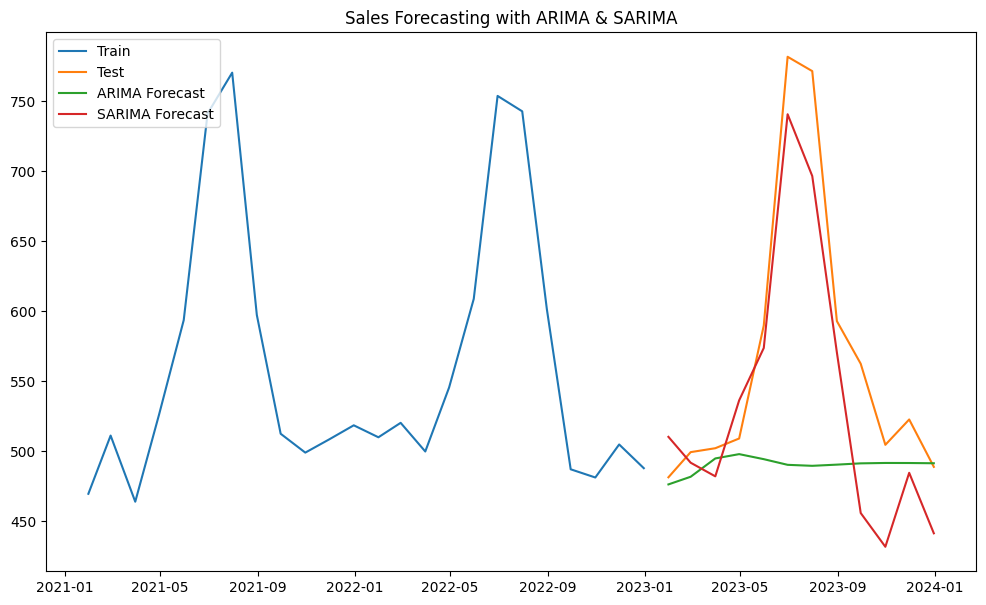

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Splitting data into training and test sets
train = df[df['Date'] < '2023-01-01']
test = df[df['Date'] >= '2023-01-01']

# ARIMA
arima_model = ARIMA(train['Sales'], order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

# SARIMA
sarima_model = SARIMAX(train['Sales'], order=(5,1,0), seasonal_order=(0,1,1,12))
sarima_result = sarima_model.fit(disp=-1)
sarima_forecast = sarima_result.forecast(steps=len(test))

# Plotting results
plt.figure(figsize=(12, 7))
plt.plot(train['Date'], train['Sales'], label='Train')
plt.plot(test['Date'], test['Sales'], label='Test')
plt.plot(test['Date'], arima_forecast, label='ARIMA Forecast')
plt.plot(test['Date'], sarima_forecast, label='SARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Sales Forecasting with ARIMA & SARIMA')
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error

# ... [Rest of the code]

# Predictions on train data
# Predictions on train data
start_date = train.index[0]
end_date = train.index[-1]
arima_train_pred = arima_result.predict(start=start_date, end=end_date)
sarima_train_pred = sarima_result.predict(start=start_date, end=end_date)

# RMSE for ARIMA and SARIMA on training data
arima_train_rmse = np.sqrt(mean_squared_error(train['Sales'], arima_train_pred))
sarima_train_rmse = np.sqrt(mean_squared_error(train['Sales'], sarima_train_pred))

# ... Rest of the code


# RMSE for ARIMA and SARIMA on test data
arima_test_rmse = np.sqrt(mean_squared_error(test['Sales'], arima_forecast))
sarima_test_rmse = np.sqrt(mean_squared_error(test['Sales'], sarima_forecast))

print(f"ARIMA Train RMSE: {arima_train_rmse:.2f}")
print(f"SARIMA Train RMSE: {sarima_train_rmse:.2f}")
print(f"ARIMA Test RMSE: {arima_test_rmse:.2f}")
print(f"SARIMA Test RMSE: {sarima_test_rmse:.2f}")

# ... [Plotting code]


ARIMA Train RMSE: 113.39
SARIMA Train RMSE: 121.48
ARIMA Test RMSE: 126.15
SARIMA Test RMSE: 50.41
